MSM from "primitive clustering" along rama-plot
====

In [2]:
import pyemma
pyemma.__version__

'2.1.1'

In [3]:
import os
%pylab inline
matplotlib.rcParams.update({'font.size': 12})

Populating the interactive namespace from numpy and matplotlib


In [4]:
import pyemma.coordinates as coor
import pyemma.msm as msm
import pyemma.plots as mplt
import msmbuilder
from msmbuilder.msm.ratematrix import ContinuousTimeMSM
import scipy
from msmtools.analysis.dense.decomposition import eigenvectors, eigenvalues
import operator

Read in the dtrajs
------

In [10]:
indir = '/data/isilon/rudzinski/cluster_tmp/AAQAA/AAQAA_hybrid_AMBER_Go/wDB-HP_inter/NC_CA/2016_10_21/epsNC-9/epsNC-9_epsdb-0.2epsNC_epshp-0.5epsNC/T-300/'

traj_dir_base = 'run_from_Qhel-'
Qhel_val = ['0.0','0.1','0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9']

Nrama = 15
GLN_rama = [4,9,14]
dtraj_rama = []
for rama in range(Nrama):
    dtraj_rama.append([])
    for i in range (len(Qhel_val)):
        for j in range(4):
            traj_dir = indir+traj_dir_base+Qhel_val[i]+'/run'+str(j+1)+'/'
            if (rama+2 in GLN_rama):
                dtraj_rama[rama].append( np.genfromtxt(traj_dir+'rama_GLN'+str(rama+2)+'.xvg')[:,0:2] )
            else:
                dtraj_rama[rama].append( np.genfromtxt(traj_dir+'rama_ALA'+str(rama+2)+'.xvg')[:,0:2] )

In [11]:
for rama in range(Nrama):
    for i in range( len(dtraj_rama[0]) ):
        dtraj_rama[rama][i][np.where(dtraj_rama[rama][i][:,1] < -125)[0],1] += 360  

In [12]:
dtraj_phi = []
for rama in range(Nrama):
    dtraj_phi.append([])
    for i in range( len(dtraj_rama[rama]) ):
        dtraj_phi[rama].append(dtraj_rama[rama][i][:,1])

**simple clustering along psi only for discretization**

In [13]:
n_clusters = 2     # number of k-means clusters

In [14]:
clustering_rama = []
for rama in range(Nrama):
    clustering_rama.append(coor.cluster_kmeans(dtraj_phi[rama],k=n_clusters,max_iter=100, tolerance=1e-12, fixed_seed=True))

19-12-16 09:48:25 pyemma.coordinates.clustering.kmeans.KmeansClustering[0] INFO     Cluster centers converged after 6 steps.
19-12-16 09:48:27 pyemma.coordinates.clustering.kmeans.KmeansClustering[1] INFO     Cluster centers converged after 6 steps.
19-12-16 09:48:29 pyemma.coordinates.clustering.kmeans.KmeansClustering[2] INFO     Cluster centers converged after 7 steps.
19-12-16 09:48:31 pyemma.coordinates.clustering.kmeans.KmeansClustering[3] INFO     Cluster centers converged after 8 steps.
19-12-16 09:48:33 pyemma.coordinates.clustering.kmeans.KmeansClustering[4] INFO     Cluster centers converged after 6 steps.
19-12-16 09:48:35 pyemma.coordinates.clustering.kmeans.KmeansClustering[5] INFO     Cluster centers converged after 7 steps.
19-12-16 09:48:37 pyemma.coordinates.clustering.kmeans.KmeansClustering[6] INFO     Cluster centers converged after 7 steps.
19-12-16 09:48:39 pyemma.coordinates.clustering.kmeans.KmeansClustering[7] INFO     Cluster centers converged after 8 steps.


Exception in thread Thread-27:
Traceback (most recent call last):
  File "/home/theorie/rudzinski/soft/anaconda/envs/PyEmma-new/lib/python2.7/threading.py", line 801, in __bootstrap_inner
    self.run()
  File "/home/theorie/rudzinski/soft/anaconda/envs/PyEmma-new/lib/python2.7/threading.py", line 1073, in run
    self.function(*self.args, **self.kwargs)
  File "/people/thnfs/homes/rudzinski/soft/PyEMMA-2-cluster/pyemma/_base/progress/bar/gui.py", line 109, in hide_widget
    widget.close()
  File "/home/theorie/rudzinski/soft/anaconda/envs/PyEmma-new/lib/python2.7/site-packages/ipywidgets/widgets/widget.py", line 221, in close
    Widget.widgets.pop(self.model_id, None)
  File "/home/theorie/rudzinski/soft/anaconda/envs/PyEmma-new/lib/python2.7/site-packages/ipywidgets/widgets/widget.py", line 208, in model_id
    return self.comm.comm_id
AttributeError: 'NoneType' object has no attribute 'comm_id'



19-12-16 09:48:52 pyemma.coordinates.clustering.kmeans.KmeansClustering[13] INFO     Cluster centers converged after 7 steps.
19-12-16 09:48:53 pyemma.coordinates.clustering.kmeans.KmeansClustering[14] INFO     Cluster centers converged after 6 steps.


[ 148.73078918   10.23228645]
[ 148.76834106    2.90133953]
[  -0.21358506  139.54244995]
[   6.21602154  149.03166199]
[   4.04927588  145.31329346]
[   8.09793186  142.6027832 ]
[ 151.77124023   -4.75833464]
[ 140.8401947    -4.34309006]
[   4.39270115  152.1529541 ]
[   4.70348787  146.45698547]
[   6.31776619  143.61904907]
[ 151.42303467   -1.34257042]
[  1.38870071e+02  -1.26133531e-01]
[ 144.22189331   10.91026878]
[ 148.30589294    0.38331881]


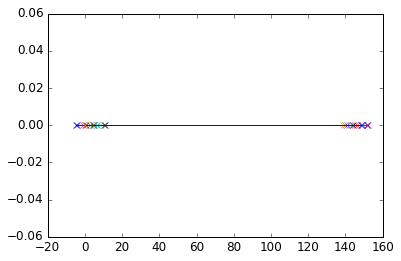

In [15]:
cc_rama = []
for rama in range(Nrama):
    cc_rama.append(clustering_rama[rama].clustercenters[:,0])
    plt.plot(cc_rama[rama],np.zeros(len(cc_rama[rama])),marker='x')
    print cc_rama[rama]

In [16]:
dtrajs_rama = []
for rama in range(Nrama):
    dtrajs_rama.append(clustering_rama[rama].dtrajs)

In [17]:
for rama in range(Nrama):
    for traj in range( len(dtraj_rama[rama]) ):
        if ( dtrajs_rama[rama][traj][np.where(dtraj_phi[rama][traj] < 0)[0][0]] != 0 ):
            dtrajs_rama[rama][traj][np.where(dtrajs_rama[rama][traj] == 0)[0]] -= 1
            dtrajs_rama[rama][traj][np.where(dtrajs_rama[rama][traj] == 1)[0]] -= 1
            dtrajs_rama[rama][traj][np.where(dtrajs_rama[rama][traj] == -1)[0]] += 2

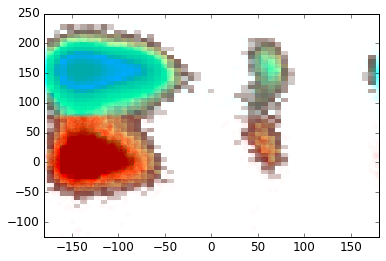

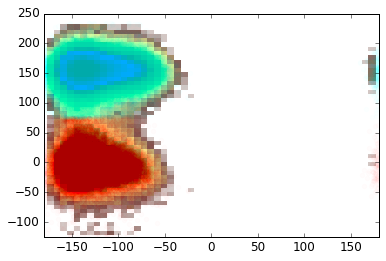

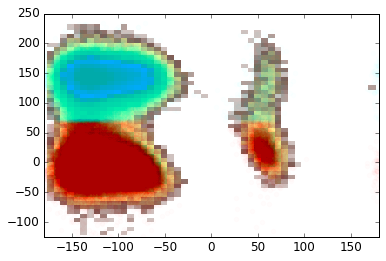

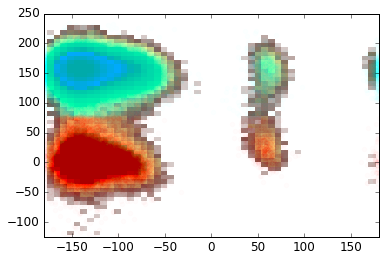

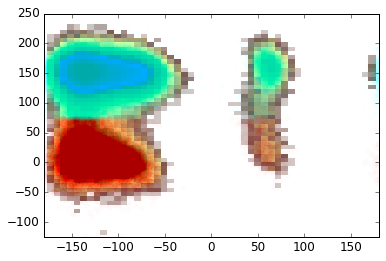

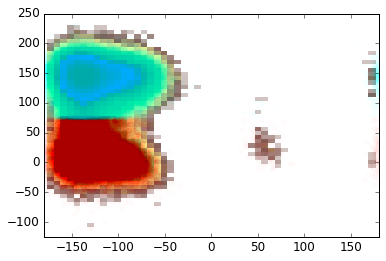

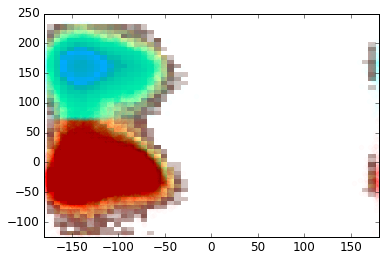

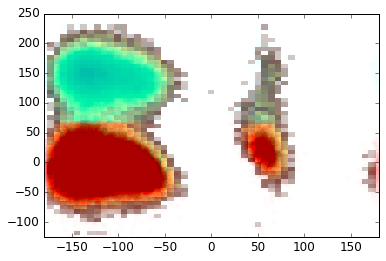

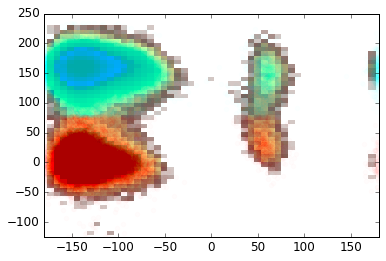

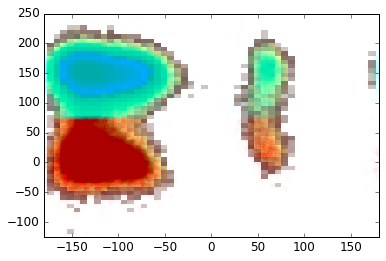

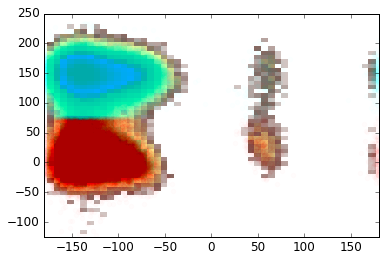

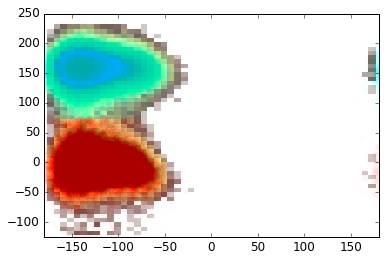

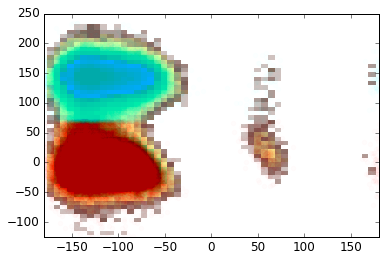

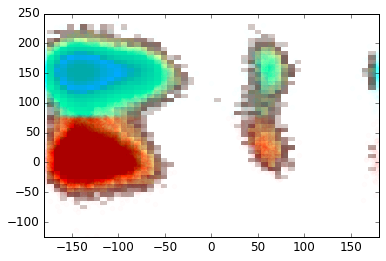

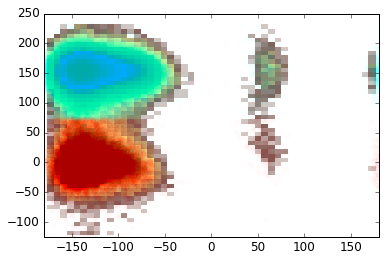

In [18]:
for rama in range(Nrama):
    H_rama, phi_edges, psi_edges = np.histogram2d(dtraj_rama[rama][0][:,0], dtraj_rama[rama][0][:,1], bins=50, range=None, normed=None, weights=None )
    phi_bins = 0.5*(phi_edges[1:] + phi_edges[:-1])
    psi_bins = 0.5*(psi_edges[1:] + psi_edges[:-1]) 

    H_rama = np.rot90(H_rama)
    H_rama = np.flipud(H_rama)
    FE_H = -np.ma.log(H_rama)
    FE_H -= np.min(FE_H)
    FE_max = np.max(FE_H)
    FE_H = FE_H.filled()
    plt.pcolormesh(phi_bins, psi_bins, FE_H, cmap='terrain', vmax=FE_max)
    plt.scatter(dtraj_rama[rama][0][np.where(dtrajs_rama[rama][0]==0),0],dtraj_rama[rama][0][np.where(dtrajs_rama[rama][0]==0),1],color='red',alpha=0.01)
    plt.scatter(dtraj_rama[rama][0][np.where(dtrajs_rama[rama][0]==1),0],dtraj_rama[rama][0][np.where(dtrajs_rama[rama][0]==1),1],color='cyan',alpha=0.01)
    plt.xlim([-180,180])
    plt.ylim([-125,250])
    plt.show()

In [19]:
dtrajs = []
for i in range( len(dtraj_rama[0]) ):
    tmp = np.stack( (dtrajs_rama[0][i], dtrajs_rama[1][i]) )
    for rama in range(2,Nrama):
        tmp = np.vstack( (tmp, dtrajs_rama[rama][i]) )
    dtrajs.append( tmp.T )
    dtrajs[i].astype('int64')

In [24]:
Nh = 1.0 - np.mean(dtrajs)
print Nh

0.384432802836


In [29]:
from copy import deepcopy
dtrajs_LR = deepcopy(dtrajs)

In [31]:
for traj in range(len(dtrajs)):
    for fr in range(dtrajs[traj].shape[0]):
        for rama in range(dtrajs[traj].shape[1]):
            if ( dtrajs[traj][fr][rama] == 1 ):
                dtrajs_LR[traj][fr][rama] = 0
            else:
                dtrajs_LR[traj][fr][rama] = 1
                if ( (rama!=0) and (rama!=dtrajs[traj].shape[1]-1) ):
                    if ( (dtrajs[traj][fr][rama-1]==0) and (dtrajs[traj][fr][rama+1]==0) ):
                        dtrajs_LR[traj][fr][rama] = 2

In [40]:
N_h_LR = 0
for traj in range(len(dtrajs)):
    N_h_LR += len(np.where(dtrajs_LR[traj]==2)[0])
N_h_LR /= 1.*len(dtrajs)*dtrajs[0].shape[0]*(dtrajs[0].shape[1]-2)

In [41]:
N_h_LR

0.09604392362653572